In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,roc_auc_score
 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [59]:
df.shape

(614, 13)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [63]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [65]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
df['Credit_History']=df['Credit_History'].astype('int')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int')


In [66]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,95,44,139
1,97,378,475
All,192,422,614


In [67]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [70]:
df=df.replace(to_replace='3+',value=4)

In [71]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [72]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.412162,342.000000,0.773616
std,6109.041673,2926.24876,84.037468,64.372489,0.418832
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [73]:
cat_cols=[x for x in df.columns if df[x].dtypes=='O']
num_cols=[y for y in df.columns if df[y].dtypes!='O']

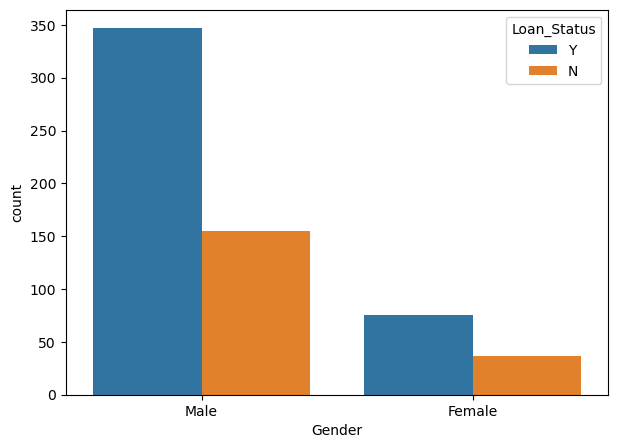

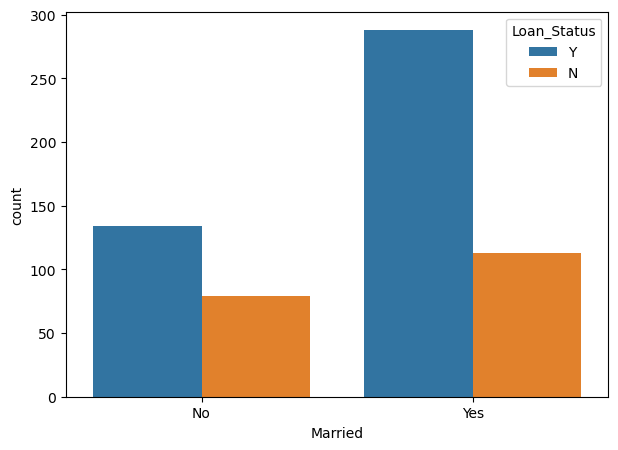

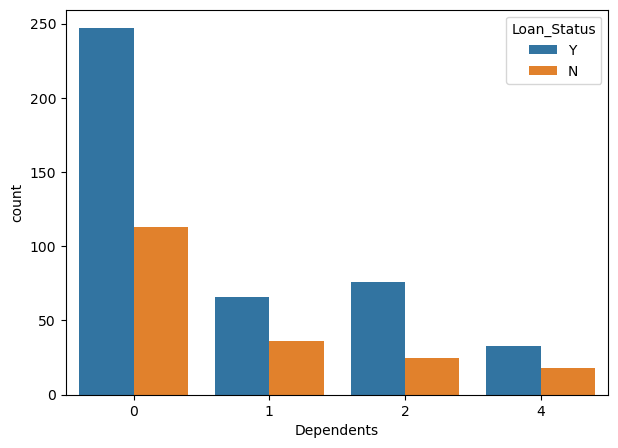

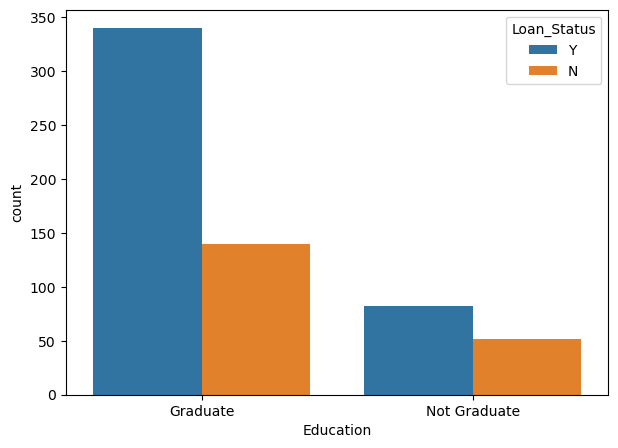

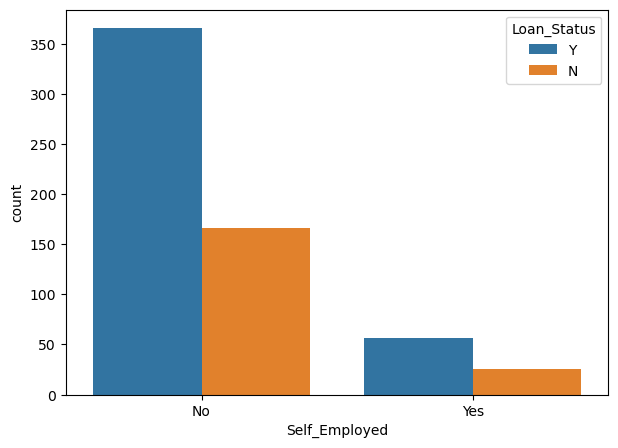

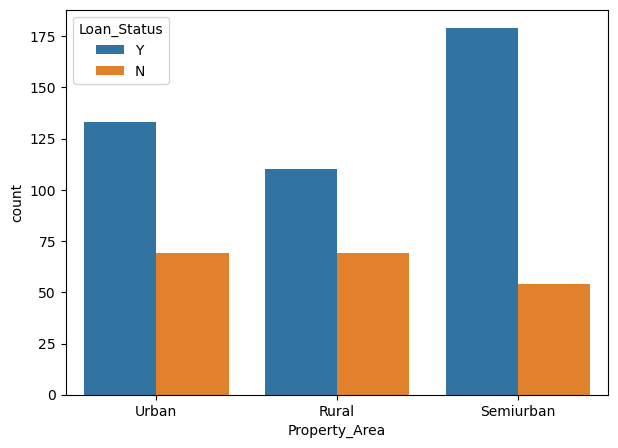

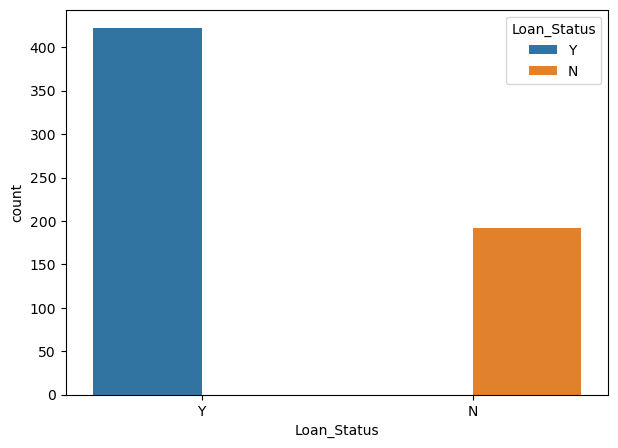

In [74]:
for i in df[cat_cols]:
    plt.figure(figsize=(7,5))
    chart=sns.countplot(x=i,data=df,hue='Loan_Status')
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

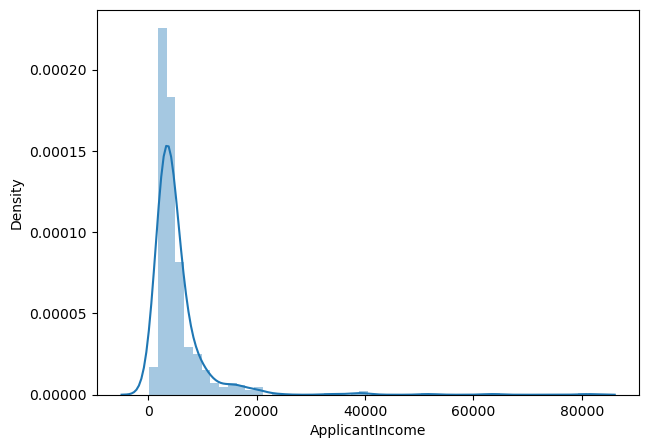

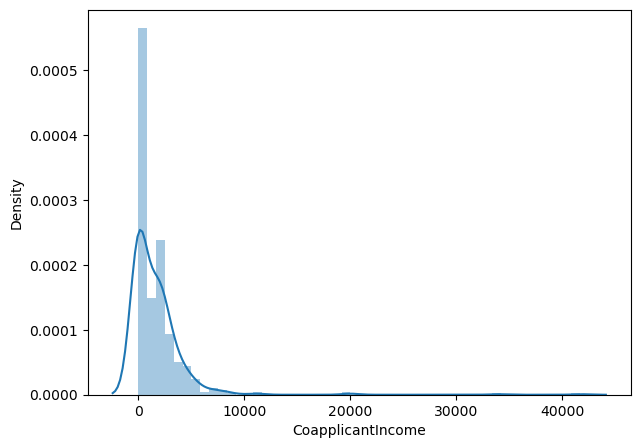

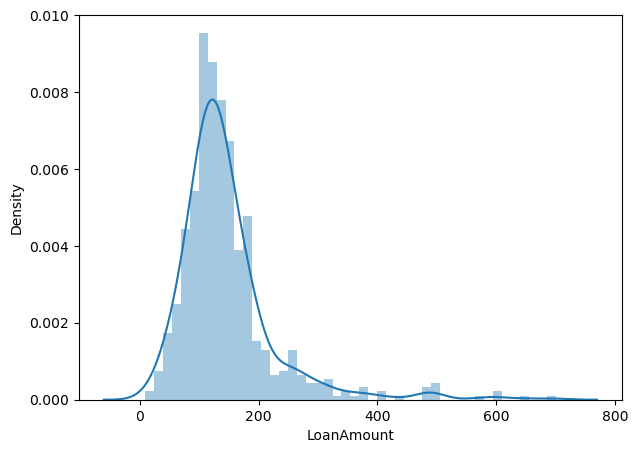

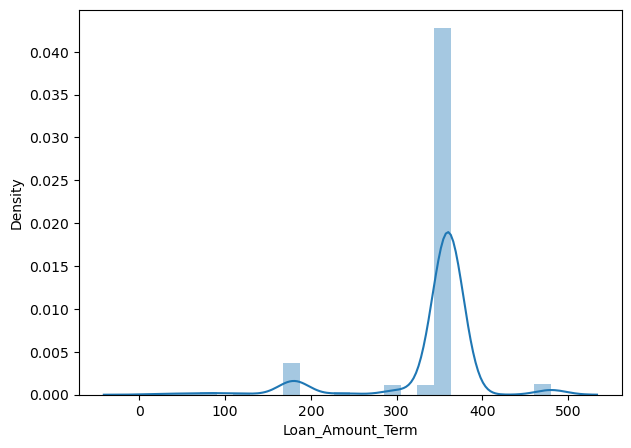

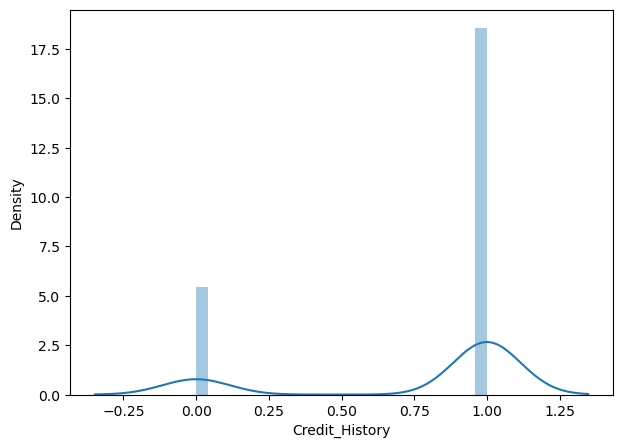

In [75]:

for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i])
    plt.xlabel(i)
    
plt.show()

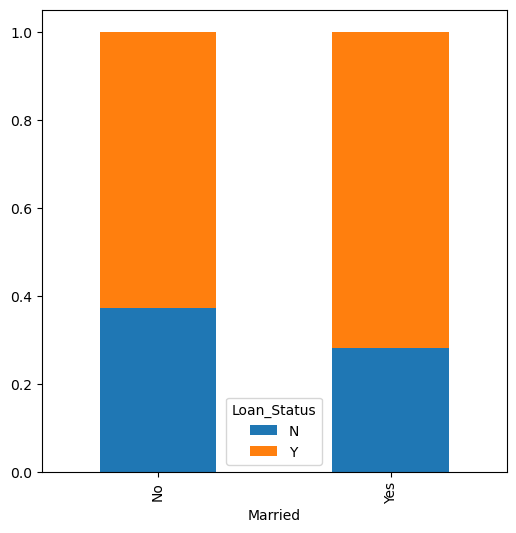

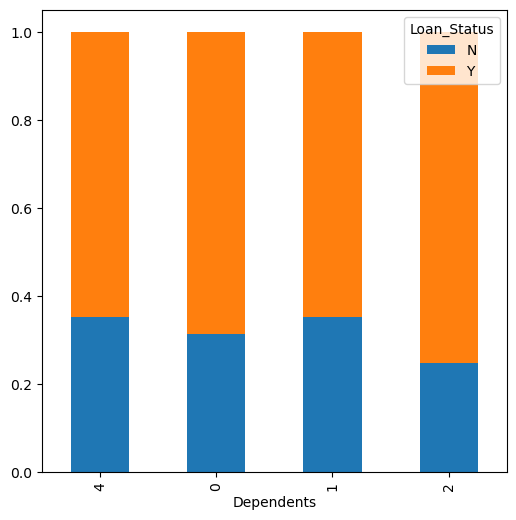

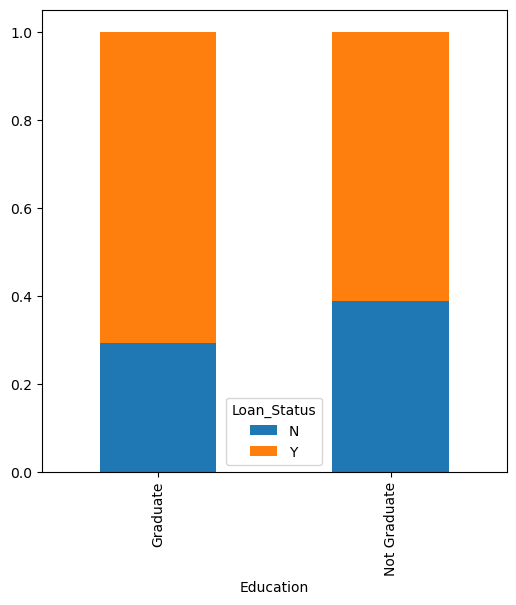

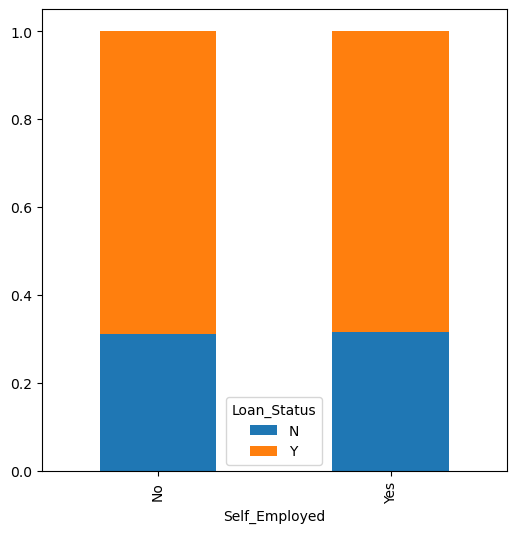

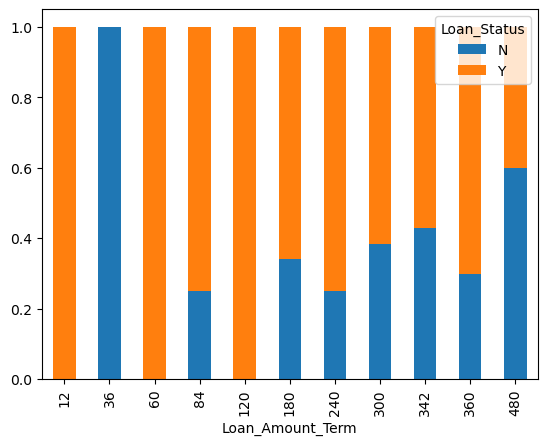

In [76]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
ct=pd.crosstab(df.Loan_Amount_Term,df.Loan_Status,normalize='index')

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.show()
ct.plot.bar(stacked=True)
plt.show()



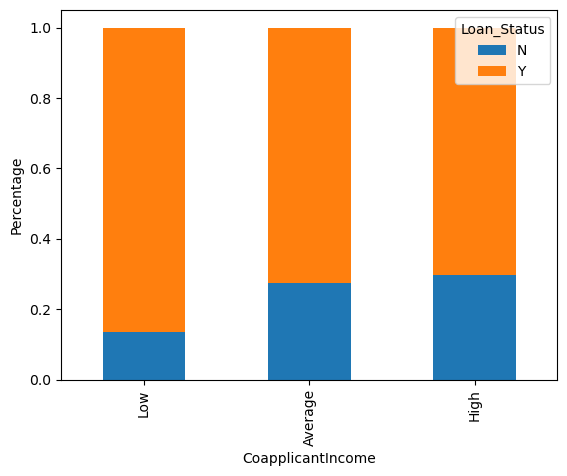

In [77]:
bins=[0,1000,3000,10000]
group=['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
p=plt.ylabel('Percentage')

In [78]:
from scipy.stats import zscore

z_score=zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)
new_df=df[filtering_entry]

In [79]:
df.shape

(614, 13)

In [80]:
new_df.shape

(577, 13)

In [81]:
((df.shape[0]-new_df.shape[0])/df.shape[0]*100)

6.026058631921824

In [82]:
df=new_df

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)

df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_Income_bin
0,1,0,0,0,0,5849,0,146.412162,360,1,2,1,NaN
1,1,1,1,0,0,4583,1508,128.000000,360,1,0,0,Average
2,1,1,0,0,1,3000,0,66.000000,360,1,2,1,NaN
3,1,1,0,1,0,2583,2358,120.000000,360,1,2,1,Average
4,1,0,0,0,0,6000,0,141.000000,360,1,2,1,NaN


In [84]:
df.drop(["Coapplicant_Income_bin"],axis=1,inplace=True)

In [85]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [86]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
df['ApplicantIncome']=scaler.fit_transform(df['ApplicantIncome'].values.reshape(-1,1))
df['CoapplicantIncome']=scaler.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1))
df['LoanAmount']=scaler.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=scaler.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=scaler.fit_transform(df['Credit_History'].values.reshape(-1,1))
df.skew()


Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191870
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

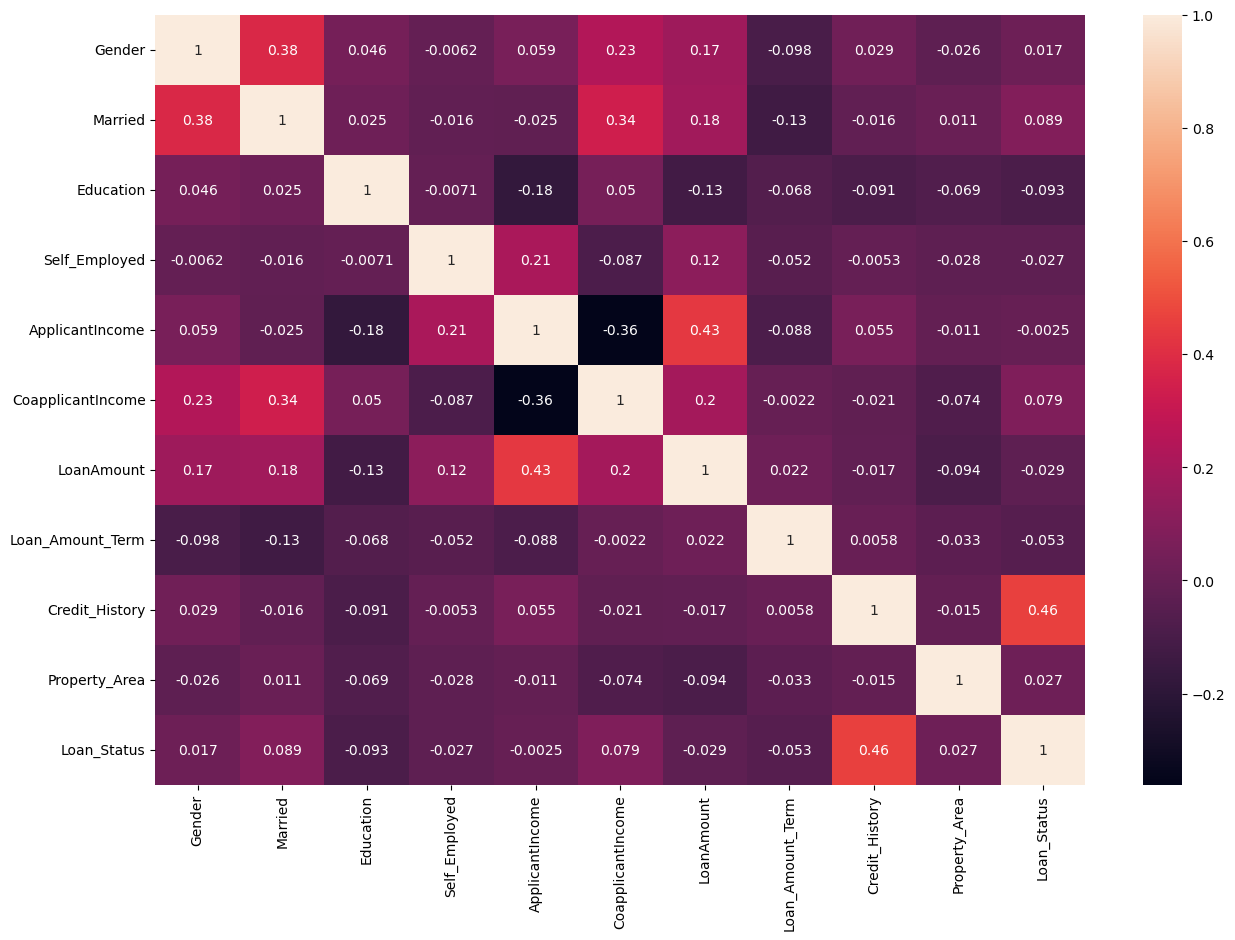

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

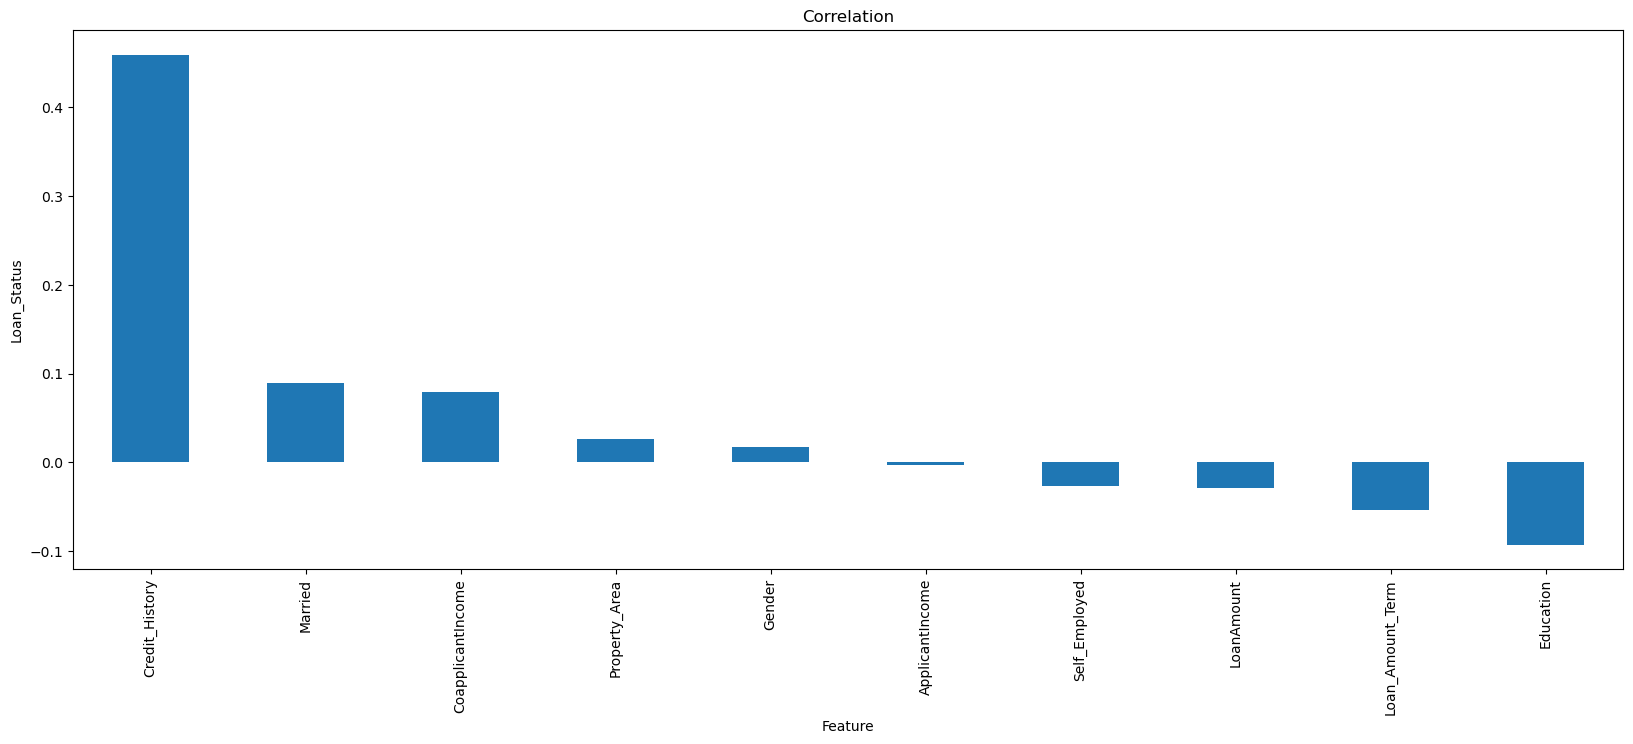

In [88]:
plt.figure(figsize=(20,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loan_Status')
plt.title('Correlation')
plt.show()

In [89]:
!pip install imblearn

In [90]:
#X=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']
X=df.drop(columns=['Loan_Status'])

In [91]:
X.shape

(577, 11)

In [92]:
y.shape

(577,)

In [93]:
#df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
x=pd.DataFrame(X)
from imblearn.over_sampling import SMOTE
SM=SMOTE()
#df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

X, y=SM.fit_resample(X,y)
y.value_counts()


1    398
0    398
Name: Loan_Status, dtype: int64

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report   
from sklearn.tree import DecisionTreeClassifier

In [95]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [96]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=.30, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is ',maxAccu ,'on Random_state ',maxRS)

Maximum r2 score is  0.7866108786610879 on Random_state  113


In [97]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=maxRS)

In [98]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))


0.7866108786610879
[[ 85  29]
 [ 22 103]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       114
           1       0.78      0.82      0.80       125

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.79       239
weighted avg       0.79      0.79      0.79       239



In [99]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))


0.7238493723849372
[[87 27]
 [39 86]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       114
           1       0.76      0.69      0.72       125

    accuracy                           0.72       239
   macro avg       0.73      0.73      0.72       239
weighted avg       0.73      0.72      0.72       239



In [100]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8326359832635983
[[ 98  16]
 [ 24 101]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       114
           1       0.86      0.81      0.83       125

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239



In [101]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7740585774058577
[[ 85  29]
 [ 25 100]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       114
           1       0.78      0.80      0.79       125

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



In [102]:
from sklearn.model_selection import cross_val_score

rw=cross_val_score(LR,X,y,cv=5)
print("cross Validation Score of LogisticRegression model:",rw.mean())

rw=cross_val_score(DT,X,y,cv=5)
print("cross Validation Score of DecisionTree model:",rw.mean())

rw=cross_val_score(rf,X,y,cv=5)
print("cross Validation Score of RandomForest model:",rw.mean())

rw=cross_val_score(svc,X,y,cv=5)
print("cross Validation Score of SVC model:",rw.mean())

cross Validation Score of LogisticRegression model: 0.7072877358490566
cross Validation Score of DecisionTree model: 0.7260770440251573
cross Validation Score of RandomForest model: 0.781438679245283
cross Validation Score of SVC model: 0.7424606918238993


In [103]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [104]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)
print("All models are trained")

All models are trained


In [105]:
LR.score(x_test,y_test)
DT.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)
print("ROC AUC score of Logisticregression model",roc_auc_score(y_test,LR.predict(x_test)))
print("ROC AUC score of DecisionTree model",roc_auc_score(y_test,DT.predict(x_test)))
print("ROC AUC score of RandomForest model",roc_auc_score(y_test,rf.predict(x_test)))
print("ROC AUC score of SVC model",roc_auc_score(y_test,svc.predict(x_test)))

ROC AUC score of Logisticregression model 0.7848070175438596
ROC AUC score of DecisionTree model 0.6861052631578948
ROC AUC score of RandomForest model 0.8174385964912281
ROC AUC score of SVC model 0.7728070175438596


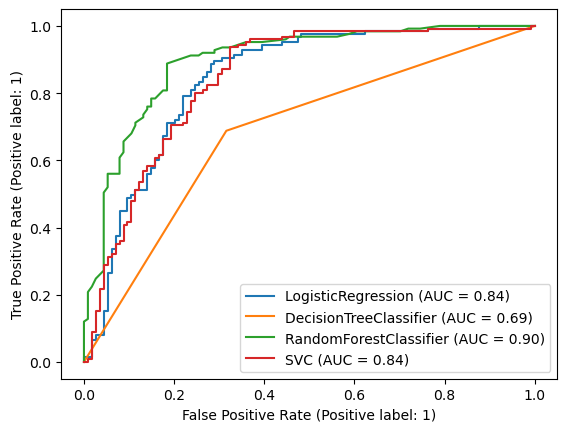

In [106]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay
disp=RocCurveDisplay.from_estimator(LR,x_test, y_test)
RocCurveDisplay.from_estimator(DT,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svc,x_test, y_test, ax=disp.ax_)
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[200,800],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [108]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [110]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [111]:
model=RandomForestClassifier(criterion='gini',
                            max_depth=8,
                            max_features='sqrt',
                             n_estimators=200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

print(f"Accuracy Score :{accuracy_score(y_test,pred)*100}%")
print(f"roc_auc_score :{roc_auc_score(y_test,predrf)*100}%")
print(f"confusion matrix :{confusion_matrix(y_test,pred)}")
print(f"classification Report :{classification_report(y_test,pred)}")

         

80.75313807531381
Accuracy Score :80.75313807531381%
roc_auc_score :83.38245614035088%
confusion matrix :[[94 20]
 [26 99]]
classification Report :              precision    recall  f1-score   support

           0       0.78      0.82      0.80       114
           1       0.83      0.79      0.81       125

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239



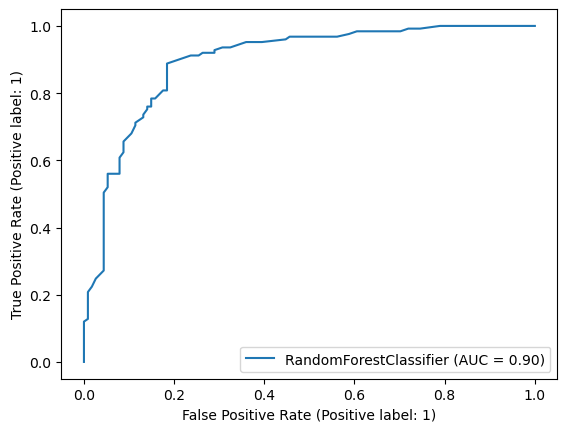

In [112]:
#RocCurveDisplay.from_estimator(model,x_test,y_test)

RocCurveDisplay.from_estimator(rf, x_test, y_test)
plt.show()

In [113]:
import joblib
joblib.dump(model,"Loan Application Status.pk1")

['Loan Application Status.pk1']

In [114]:
model=joblib.load("Loan Application Status.pk1")
a=np.array(y_test)
prediction=model.predict(x_test)
df_final=pd.DataFrame({"Original": a,"Predicted": prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,0
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
234,0,0
235,1,1
236,1,1
237,1,1


In [ ]:
##Based on customer details our model will identify customer segments,those are eligible for loan amount